In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
plt.rcParams["font.family"] = "STXIHEI"

import statsmodels.api as sm

In [2]:
from sklearn import datasets

boston = datasets.load_boston()

In [3]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
bostondf = pd.DataFrame(boston.data,columns = boston.feature_names)
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
from sklearn import preprocessing

std = preprocessing.StandardScaler()
std

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
std.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [8]:
std.fit(boston.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
std.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [10]:
std.var_

array([7.38403597e+01, 5.42861840e+02, 4.69714297e+01, 6.43854770e-02,
       1.34010989e-02, 4.92695216e-01, 7.90792473e+02, 4.42525226e+00,
       7.56665313e+01, 2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
       5.08939794e+01])

In [11]:
ZX = std.transform(boston.data)
ZX[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [12]:
std.fit_transform(boston.data)[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [13]:
reg.fit(boston.data,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [15]:
pred = reg.predict(boston.data)
pred[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [16]:
reg.score(boston.data,boston.target)

0.7406426641094094

In [17]:
std.mean_,std.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [18]:
reg.intercept_,reg.coef_

(36.45948838509001,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

In [19]:
preprocessing.scale(boston.data)[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [20]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
 bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(bostondf)
X_scaled[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [23]:
X_scaled.mean(axis = 0),X_scaled.std(axis = 0)

(array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15,  4.70199198e-16,
         2.49032240e-15, -1.14523016e-14, -1.40785495e-15,  9.21090169e-16,
         5.44140929e-16, -8.86861950e-16, -9.20563581e-15,  8.16310129e-15,
        -3.37016317e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [24]:
# 对整个矩阵坐标化
X_scaled1 = preprocessing.scale(bostondf,axis = 0)
X_scaled1[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [25]:
preprocessing.scale(boston.target)[:10]

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548])

In [26]:
std = preprocessing.StandardScaler()
std.fit(bostondf)
std.mean_,std.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [27]:
std.transform(bostondf[:2])

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [28]:
rscaler = preprocessing.RobustScaler()
rs = rscaler.fit_transform(bostondf)
rs[:2]

array([[-0.06959315,  1.44      , -0.57164988,  0.        ,  0.        ,
         0.49661247, -0.25076453,  0.28577673, -0.2       , -0.0878553 ,
        -1.33928571,  0.26190191, -0.63768116],
       [-0.06375455,  0.        , -0.20294345,  0.        , -0.39428571,
         0.28794038,  0.0285423 ,  0.56978872, -0.15      , -0.22739018,
        -0.44642857,  0.26190191, -0.22188906]])

In [29]:
np.median(rs,axis = 0), rs.mean(axis = 0),rs.std(axis = 0)

(array([-7.69783542e-18,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.19910243e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.86877377e-17]),
 array([ 0.93379097,  0.90909091,  0.11206651,  0.06916996,  0.09540034,
         0.10316313, -0.1819592 ,  0.1902672 ,  0.22747036,  0.20216319,
        -0.21230943, -1.66763249,  0.1292417 ]),
 array([2.39025083, 1.86395166, 0.53087301, 0.25374293, 0.66150352,
        0.95111452, 0.57331361, 0.68117165, 0.43493256, 0.43506588,
        0.77243043, 4.37484626, 0.71304364]))

d:\python37\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


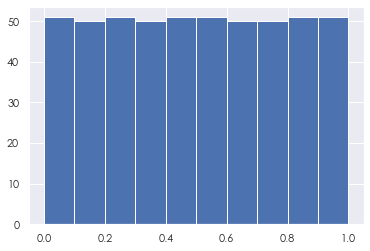

In [30]:
QT = preprocessing.QuantileTransformer()
qtres = QT.fit_transform(bostondf)
pd.DataFrame(qtres)[0].hist()

In [31]:
# threshold 阈值 <= 为0 > 为1
preprocessing.binarize(bostondf,threshold = 2.5)[:2]

array([[0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.]])

In [32]:
enc = preprocessing.OneHotEncoder()
# 第一列 0，1 两个类别
# 必须是数值型
enc.fit([
    [0,0,3],
    [1,1,0],
    [0,2,1],
    [1,0,2]
])
enc.transform([[0,1,3]]).toarray()

d:\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [33]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
bostondf.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [35]:
bostondf.RAD.astype("int").astype("str").value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [36]:
pd.get_dummies(bostondf.RAD.astype("int").astype("str"),prefix = "RAD").head()

,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [37]:
from sklearn.preprocessing import Imputer

imp = Imputer()
imp.fit([
    [1,2],
    [np.nan,3],
    [7,6]
])
imp.transform([
    [np.nan,2],
    [6,np.nan]
])

d:\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.        , 2.        ],
       [6.        , 3.66666667]])

In [38]:
imp.statistics_

array([4.        , 3.66666667])

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3,interaction_only = True)
polyres = poly.fit_transform(bostondf.iloc[:,[0,1,2,3]])

In [40]:
# 各列 cons 0 1 2 3 01 02 03 12 13 ....
polyres[:1]

array([[1.000000e+00, 6.320000e-03, 1.800000e+01, 2.310000e+00,
        0.000000e+00, 1.137600e-01, 1.459920e-02, 0.000000e+00,
        4.158000e+01, 0.000000e+00, 0.000000e+00, 2.627856e-01,
        0.000000e+00, 0.000000e+00, 0.000000e+00]])

In [41]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
# log(1+X)
transformer = FunctionTransformer(np.log1p)
X = np.array([
    [0,1],
    [2,3]
])
transformer.transform(X)

d:\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [42]:
from sklearn.feature_selection import VarianceThreshold
X = [
    [0,2,0,3],
    [0,1,4,3],
    [0,1,1,3]
]
selector = VarianceThreshold()
selector.fit(X)
selector.variances_

array([0.        , 0.22222222, 2.88888889, 0.        ])

In [43]:
selector.transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

In [44]:
boston.data[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# k = 2 筛选两个最重要的变量
X2 = SelectKBest(f_regression,k = 2).fit_transform(boston.data,boston.target)

In [46]:
X2[:2]

array([[6.575, 4.98 ],
       [6.421, 9.14 ]])

In [47]:
pd.DataFrame(boston.data,columns = boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import f_regression

SelFpr = SelectFpr(f_regression,alpha = 10e-10).fit(boston.data,boston.target)
SelFpr.pvalues_

array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
       7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
       5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
       5.08110339e-88])

In [49]:
SelFpr.scores_

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

In [50]:
SelFpr.transform(boston.data)[:2]

array([[6.320e-03, 1.800e+01, 2.310e+00, 5.380e-01, 6.575e+00, 6.520e+01,
        1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02, 4.980e+00],
       [2.731e-02, 0.000e+00, 7.070e+00, 4.690e-01, 6.421e+00, 7.890e+01,
        2.000e+00, 2.420e+02, 1.780e+01, 3.969e+02, 9.140e+00]])

In [51]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression

GenSel = GenericUnivariateSelect(f_regression,mode = "fpr",param = 10e-10).fit(boston.data,boston.target)

In [52]:
GenSel.pvalues_

array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
       7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
       5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
       5.08110339e-88])

In [53]:
GenSel.transform(boston.data)[:2]

array([[6.320e-03, 1.800e+01, 2.310e+00, 5.380e-01, 6.575e+00, 6.520e+01,
        1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02, 4.980e+00],
       [2.731e-02, 0.000e+00, 7.070e+00, 4.690e-01, 6.421e+00, 7.890e+01,
        2.000e+00, 2.420e+02, 1.780e+01, 3.969e+02, 9.140e+00]])

In [54]:
boston.data[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(boston.data,boston.target)
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [56]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(reg,threshold = 0.1)
sfm.fit(boston.data,boston.target)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [57]:
sfm.transform(boston.data)[:2]

array([[6.3200e-03, 0.0000e+00, 5.3800e-01, 6.5750e+00, 4.0900e+00,
        1.0000e+00, 1.5300e+01, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 4.6900e-01, 6.4210e+00, 4.9671e+00,
        2.0000e+00, 1.7800e+01, 9.1400e+00]])

In [58]:
from sklearn import preprocessing
iris = datasets.load_iris()
X_scaled = preprocessing.scale(iris.data)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [61]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [62]:
# 线性回归
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(boston.data,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(reg.coef_,reg.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838509001


In [64]:
reg.score(boston.data,boston.target)

0.7406426641094094

In [65]:
reg.predict(boston.data[:10])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [66]:
boston.data[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

IX = poly.fit_transform(boston.data)
print(len(IX[1]))
IX[1]

105


array([1.00000000e+00, 2.73100000e-02, 0.00000000e+00, 7.07000000e+00,
       0.00000000e+00, 4.69000000e-01, 6.42100000e+00, 7.89000000e+01,
       4.96710000e+00, 2.00000000e+00, 2.42000000e+02, 1.78000000e+01,
       3.96900000e+02, 9.14000000e+00, 7.45836100e-04, 0.00000000e+00,
       1.93081700e-01, 0.00000000e+00, 1.28083900e-02, 1.75357510e-01,
       2.15475900e+00, 1.35651501e-01, 5.46200000e-02, 6.60902000e+00,
       4.86118000e-01, 1.08393390e+01, 2.49613400e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.99849000e+01,
       0.00000000e+00, 3.31583000e+00, 4.53964700e+01, 5.57823000e+02,
       3.51173970e+01, 1.41400000e+01, 1.71094000e+03, 1.25846000e+02,
       2.80608300e+03, 6.46198000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [68]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(IX,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
reg.score(IX,boston.target)

0.9239966560698284

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

IX = poly.fit_transform(boston.data)
print(len(IX[1]))

560


In [71]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(IX,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
reg.score(IX,boston.target)

0.9979693876418608

In [73]:
dfridge = pd.read_excel("DmData.xlsx",sheet_name = "ridge")
dfridge.head()

,long,touwei,weight,y
0,13.0,9.2,50,13
1,18.7,13.2,102,14
2,21.0,14.8,150,15
3,19.0,13.3,110,16
4,22.8,16.0,200,17


In [74]:
reg = linear_model.LinearRegression()
reg.fit(dfridge.iloc[:,list(range(3))],dfridge.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
reg.score(dfridge.iloc[:,list(range(3))],dfridge.y)

0.9754229628767032

In [76]:
# 三个变量的回归系数 三个系数之间有共线性关系
reg.coef_

array([ 1.69273561, -2.15883088,  0.00747203])

In [77]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha = 0)
ridge.fit(dfridge.iloc[:,list(range(3))],dfridge.y)
ridge.coef_

array([ 1.69273561, -2.15883088,  0.00747203])

In [78]:
ridge.score(dfridge.iloc[:,list(range(3))],dfridge.y)

0.9754229628767032

In [79]:
# 保留最重要的前10个
lars = linear_model.Lars(n_nonzero_coefs = 10)
lars.fit(boston.data,boston.target)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=10, normalize=True, positive=False, precompute='auto',
     verbose=False)

In [80]:
lars.coef_

array([-3.90260976e-02,  1.61727800e-02, -3.15687900e-03,  2.42729710e+00,
       -9.25814897e+00,  4.22377413e+00,  0.00000000e+00, -8.18175590e-01,
        0.00000000e+00,  0.00000000e+00, -8.18875000e-01,  7.34088822e-03,
       -5.20944634e-01])

In [81]:
lars.active_

[12, 5, 10, 11, 3, 0, 7, 4, 1, 2]

In [82]:
lars.score(boston.data,boston.target)

0.7214303045434274

In [83]:
# 对数据进行标准化
from sklearn.preprocessing import scale

ZX = scale(boston.data)
Zy = scale(boston.target)

In [84]:
# SGDRegressor  一定要对原始数据做标准化
from sklearn.linear_model import SGDRegressor

sgdreg = SGDRegressor(max_iter = 100)
sgdreg.fit(ZX,Zy)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [85]:
sgdreg.coef_

array([-0.08056788,  0.08001138, -0.03366644,  0.08456478, -0.1485942 ,
        0.32136591, -0.0155233 , -0.27796045,  0.13351475, -0.07250064,
       -0.20444443,  0.09614449, -0.38780224])

In [86]:
sgdreg.intercept_

array([0.00145601])

In [87]:
sgdreg.score(ZX,Zy)

0.7353407766273852

In [88]:
from sklearn.linear_model import SGDRegressor

sgdreg = SGDRegressor(max_iter = 1000)
sgdreg.fit(boston.data,boston.target)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
sgdreg.coef_,sgdreg.intercept_

(array([ 1.53505679e+11, -1.83928680e+11, -6.01210303e+11,  4.81425754e+10,
         1.48353697e+10, -1.59576522e+11,  1.53850658e+11, -1.68411732e+11,
        -5.91332617e+11, -1.27133005e+11, -4.29309740e+11,  1.32472639e+11,
         3.16713694e+11]), array([-1.23658625e+10]))

In [90]:
sgdreg.score(boston.data,boston.target)

-1.3999266240556375e+25

In [91]:
from sklearn.preprocessing import binarize

tmpy = binarize(iris.target.reshape(-1,1))

In [92]:
tmpy[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [93]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()
reg.fit(iris.data,tmpy)

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
reg.intercept_

array([-0.26421853])

In [95]:
reg.coef_

array([[-0.41021713, -1.46416217,  2.26003266,  1.02103509]])

In [96]:
reg.predict_proba(iris.data)[:10]

array([[0.98389898, 0.01610102],
       [0.96437787, 0.03562213],
       [0.97669049, 0.02330951],
       [0.95672182, 0.04327818],
       [0.9854862 , 0.0145138 ],
       [0.98090696, 0.01909304],
       [0.97488887, 0.02511113],
       [0.97585412, 0.02414588],
       [0.9501211 , 0.0498789 ],
       [0.96514335, 0.03485665]])

In [97]:
reg.predict(iris.data)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
reg.score(iris.data,tmpy)

1.0

In [99]:
from sklearn.metrics import classification_report
print(classification_report(tmpy,reg.predict(iris.data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       100

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [100]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()
reg.fit(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
reg.intercept_,reg.coef_

(array([ 0.26421853,  1.09392467, -1.21470917]),
 array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
        [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
        [-1.70751526, -1.53427768,  2.47096755,  2.55537041]]))

In [102]:
print(classification_report(iris.target,reg.predict(iris.data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [103]:
from sklearn import datasets

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data,columns = iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
# 对变量做标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
irisZX = scaler.fit_transform(iris.data)
irisZX[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [105]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation = "logistic",hidden_layer_sizes=(5,5),solver = "lbfgs",random_state = 1)
clf.fit(irisZX,iris.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [106]:
clf.coefs_

[array([[-15.06727595,  -1.74362808,  -0.13534337,   3.03829635,
          -2.960923  ],
        [ -7.5013994 ,  -3.04282999,   5.48424146,  -3.78746544,
           5.82038285],
        [  8.2278762 ,  10.01723912,  -6.87800015,   4.46470415,
          -5.26874013],
        [  2.92692872,   6.62020024,  -8.77111409,   3.38572341,
          -6.17982526]]),
 array([[  5.22837455,  12.19999334,   1.01811702,   3.62643185,
           2.9743031 ],
        [  6.82172165, -17.86329533,   5.03041043,  14.84481226,
          10.40546791],
        [ -3.6334449 ,   5.07387304,  -2.72204374,  -9.73422965,
          -3.60519091],
        [  4.20736035,   1.63937064,  -1.11392399,  -0.16990295,
           3.51534393],
        [ -7.48688052,   7.67171067,  -5.15459297, -16.85890654,
          -7.54764419]]),
 array([[ -7.17726697,   7.49644613,  -0.93561861],
        [ 19.72563596,   4.64401133, -24.46188643],
        [ -7.34550482,   3.26249043,   4.10223943],
        [-13.16768346,  -1.07757917,  1

In [107]:
clf.score(irisZX,iris.target)

1.0

In [108]:
clf.predict_proba(irisZX)[:5]

array([[9.99965373e-01, 3.46268244e-05, 1.25340391e-17],
       [9.99965359e-01, 3.46414888e-05, 1.25384610e-17],
       [9.99965362e-01, 3.46379598e-05, 1.25374000e-17],
       [9.99963449e-01, 3.65510776e-05, 1.29984825e-17],
       [9.99965373e-01, 3.46268242e-05, 1.25340390e-17]])

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(irisZX,iris.target,test_size = 0.3)
x_train[0]

array([0.55333328, 0.55861082, 1.27429511, 1.71209594])

In [110]:
clf.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [111]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.9777777777777777)

In [112]:
from sklearn import datasets
boston = datasets.load_boston()

In [113]:
# 对变量做标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bostonZX = scaler.fit_transform(boston.data)
bostonZX[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

In [114]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(activation = "logistic",hidden_layer_sizes=(5,5),solver = "lbfgs",random_state = 1)
clf.fit(bostonZX,boston.target)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [115]:
clf.score(bostonZX,boston.target)

0.9409592879983049

In [116]:
from sklearn.tree import DecisionTreeClassifier

ct = DecisionTreeClassifier()
ct.fit(iris.data,iris.target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
ct.max_features_

4

In [118]:
ct.feature_importances_

array([0.        , 0.01333333, 0.56405596, 0.42261071])

In [119]:
ct.predict(iris.data)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
print(classification_report(iris.target,ct.predict(iris.data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [121]:
from sklearn.tree import export_graphviz

export_graphviz(ct,out_file = "tree.dot",feature_names = iris.feature_names,class_names = iris.target_names)

In [122]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [123]:
from sklearn.preprocessing import scale
ZX = scale(iris.data)

In [124]:
from sklearn.linear_model import SGDClassifier

sgdcls = SGDClassifier(max_iter = 100)
sgdcls.fit(ZX,iris.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
sgdcls.score(ZX,iris.target)

0.96

In [126]:
sgdcls.predict(ZX)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
sgdcls.decision_function(ZX)[:5]

array([[ 28.93531336,  -6.64256574, -81.13429702],
       [ 19.07693053,  -2.50542223, -76.43473274],
       [ 25.28166719,  -4.09313568, -78.422352  ],
       [ 22.59294109,  -2.47297963, -74.70475529],
       [ 31.7663455 ,  -7.26066841, -81.4956719 ]])

In [128]:
# K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3,random_state = 0).fit(iris.data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [129]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [130]:
kmeans.predict([iris.data[0],iris.data[100]])

array([1, 2])

In [131]:
#birch聚类

from sklearn.cluster import Birch

birch = Birch(n_clusters = 3).fit(iris.data)
birch.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [132]:
birch.predict([iris.data[0],iris.data[100]])

array([2, 0], dtype=int64)

In [133]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN().fit(iris.data)
dbscan.labels_ # 噪声样本结果为-1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [134]:
dbscan.components_ # 类中心核心样本

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3

In [135]:
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [136]:
# 增大距离
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1).fit(iris.data)
dbscan.labels_ # 噪声样本结果为-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [137]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier().fit(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(iris.target,mlp.predict(iris.data))
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

In [139]:
# 自定义类别顺序
confusion_matrix(iris.target,mlp.predict(iris.data),labels = [2,1,0])

array([[50,  0,  0],
       [ 3, 47,  0],
       [ 0,  0, 50]], dtype=int64)

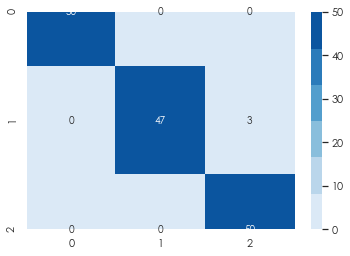

In [140]:
sns.heatmap(cm,cmap = sns.color_palette("Blues"),annot = True) # annot 显示数值

In [141]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_true = np.array([0,0,0,0,0,
                  1,1,1,1,1])
y_scores = np.array([0.1,0.2,0.25,0.4,0.6,
                    0.2,0.45,0.6,0.75,0.8])
precision,recall,thresholds = precision_recall_curve(y_true,y_scores)

In [142]:
len(precision),len(recall),len(thresholds)

(8, 8, 7)

In [143]:
thresholds

array([0.2 , 0.25, 0.4 , 0.45, 0.6 , 0.75, 0.8 ])

In [144]:
precision # 5/9

array([0.55555556, 0.57142857, 0.66666667, 0.8       , 0.75      ,
       1.        , 1.        , 1.        ])

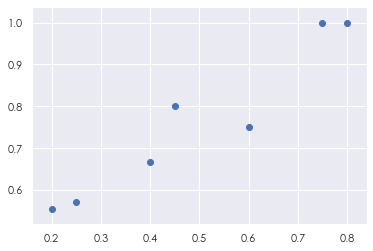

In [145]:
plt.scatter(x = thresholds,y = precision[:-1])

In [146]:
# 多值预测转换为二值预测问题
from sklearn.preprocessing import binarize

y = binarize(iris.target.reshape(-1,1))

In [147]:
pd.DataFrame(mlp.predict_proba(iris.data))[0].head()

0    0.971237
1    0.936941
2    0.960522
3    0.937282
4    0.975624
Name: 0, dtype: float64

In [148]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier().fit(iris.data,y)

d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [149]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(y,pd.DataFrame(mlp.predict_proba(iris.data))[0],pos_label = 0)

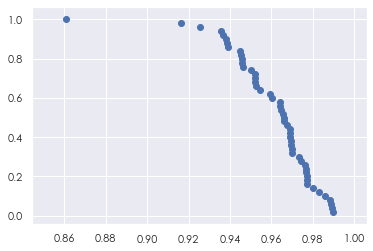

In [150]:
plt.scatter(x = thresholds,y = recall[:-1])

In [151]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_true,y_scores)

average_precision

0.8211111111111111

In [152]:
from sklearn.metrics import f1_score

mlp = MLPClassifier().fit(iris.data,iris.target)
f1_score(iris.target,mlp.predict(iris.data),average = "micro")

d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9733333333333334

In [153]:
from sklearn.metrics import classification_report

print(classification_report(iris.target,mlp.predict(iris.data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.92      0.96        50
           2       0.93      1.00      0.96        50

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



In [154]:
from sklearn.metrics import roc_curve

roc_curve(y_true,y_scores)

(array([0. , 0. , 0. , 0.2, 0.2, 0.6, 0.8, 1. ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 0.8, 1. , 1. ]),
 array([1.8 , 0.8 , 0.75, 0.6 , 0.45, 0.25, 0.2 , 0.1 ]))

In [155]:
fpr,tpr,thresholds = roc_curve(y_true,y_scores)

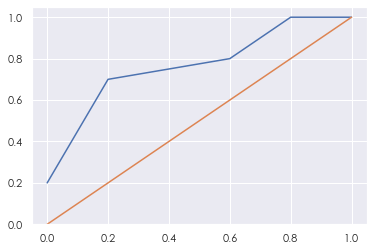

In [156]:
sns.lineplot(fpr,tpr,ci = None)
plt.ylim(0,1.05)
plt.plot([0,1],[0,1])

In [157]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true,y_scores)

0.8

In [158]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(boston.data,boston.target)
y_pred = reg.predict(boston.data)

In [159]:
# 无偏估计时两个指标的结果完成一样
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print(explained_variance_score(boston.target,y_pred))
print(r2_score(boston.target,y_pred))

0.7406426641094094
0.7406426641094094


In [160]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(iris.target,kmeans.labels_)

0.7302382722834697

In [161]:
from sklearn.metrics import mutual_info_score

mutual_info_score(iris.target,kmeans.labels_)

0.8255910976103357

In [162]:
from sklearn.metrics import mutual_info_score

mutual_info_score(kmeans.labels_,iris.target)

0.8255910976103356

In [163]:
from sklearn.metrics import silhouette_score

silhouette_score(iris.data,kmeans.labels_)

0.5528190123564091

In [164]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier().fit(iris.data,iris.target)
mlp.score(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9733333333333334

In [165]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(random_state = 0)
clf.fit(iris.data,iris.target)
clf.score(iris.data,iris.target)

0.36666666666666664

In [166]:
from sklearn import linear_model

reg = linear_model.LinearRegression().fit(boston.data,boston.target)
reg.score(boston.data,boston.target)


0.7406426641094094

In [168]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor().fit(boston.data,boston.target)
reg.score(boston.data,boston.target)

0.0

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = 0.3,random_state = 111)

In [172]:
len(X_train),len(X_test),len(y_train),len(y_test)

(354, 152, 354, 152)

In [173]:
from sklearn import linear_model

reg = linear_model.LinearRegression().fit(X_train,y_train)

In [174]:
from sklearn.metrics import r2_score
print(r2_score(y_train,reg.predict(X_train)))
print(r2_score(y_test,reg.predict(X_test)))

0.745447510005786
0.7176788943158737


In [177]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
scores = cross_val_score(reg,boston.data,boston.target,cv = 10)
# 决定系数
scores

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [178]:
scores.mean(),scores.std()

(0.2025289900605492, 0.5952960169512502)

In [186]:
# 保证数据的随机性
import numpy as np

X,y = boston.data,boston.target
indices = np.arange(y.shape[0])
# print(indices)
np.random.shuffle(indices)
# print(indices)
X,y = X[indices],y[indices]
# print(X[indices])

In [191]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,X,y,cv = 10)
# 决定系数
scores

array([0.71177105, 0.73782085, 0.71324451, 0.5589108 , 0.81127207,
       0.84660414, 0.69900731, 0.58173118, 0.67165556, 0.72189629])

In [192]:
scores.mean(),scores.std()

(0.7053913748608853, 0.08396754506745327)

In [193]:
from sklearn.model_selection import cross_validate

scoring = ["r2","explained_variance"]
scores = cross_validate(reg,boston.data,boston.target,cv = 5,scoring = scoring,return_train_score = False)

In [194]:
scores

{'fit_time': array([0.        , 0.        , 0.        , 0.00996828, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_r2': array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 'test_explained_variance': array([0.64087238, 0.74804264, 0.58804921, 0.08654425, 0.08162876])}

In [195]:
scores["test_r2"].mean()

0.35327592439588124

In [198]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(reg,boston.data,boston.target,cv = 5)
pred[:10]

array([30.2041165 , 24.78710797, 30.29277751, 28.06198225, 27.14223347,
       24.82597993, 22.89022279, 18.69757783, 10.31193024, 18.14566984])

In [200]:
r2_score(boston.target,pred)

0.5607291575860879

In [206]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

parameters = {"kernel":("linear","rbf"),"C":[1,10]}

svc = svm.SVC(probability = True)

clf = GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for un

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [207]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001342,4.623787e-04,0.000000,0.00000,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.960784,0.979167,0.980000,0.016179,1
1,0.001329,4.705275e-04,0.000332,0.00047,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.980392,0.960784,0.979167,0.973333,0.009021,3
2,0.000997,6.836514e-07,0.000000,0.00000,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,0.921569,1.000000,0.973333,0.037154,3
3,0.001330,4.699093e-04,0.000332,0.00047,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.980392,0.960784,1.000000,0.980000,0.015925,1


In [208]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [209]:
clf.decision_function(iris.data[:10])

array([[ 2.24627744,  1.2980152 , -0.30616012],
       [ 2.23781119,  1.29663601, -0.30453043],
       [ 2.24548583,  1.2968967 , -0.30542241],
       [ 2.23591041,  1.29559718, -0.30371626],
       [ 2.24795778,  1.29794432, -0.3062846 ],
       [ 2.23752685,  1.29708102, -0.30477998],
       [ 2.2434869 ,  1.2959543 , -0.30466613],
       [ 2.24100113,  1.2972027 , -0.30517051],
       [ 2.23661182,  1.2950946 , -0.30347408],
       [ 2.2375786 ,  1.29702254, -0.30474832]])

In [210]:
clf.predict_proba(iris.data[:10])

array([[0.97660607, 0.01499674, 0.00839719],
       [0.96270351, 0.0266136 , 0.01068289],
       [0.97536542, 0.0163228 , 0.00831178],
       [0.95944802, 0.0288097 , 0.01174228],
       [0.97885378, 0.01317274, 0.00797348],
       [0.96339481, 0.02377959, 0.01282559],
       [0.97267016, 0.01783921, 0.00949063],
       [0.96871754, 0.02104635, 0.01023611],
       [0.96045762, 0.02843471, 0.01110767],
       [0.96238033, 0.02673033, 0.01088933]])

In [214]:
# 随机搜索
import scipy.stats as ss
from sklearn import svm,datasets
from sklearn.model_selection import RandomizedSearchCV

iris = datasets.load_iris()
parameters = {"C":ss.expon(scale = 100),"gamma":ss.expon(scale = .1),"kernel":["linear","rbf"],"class_weight":["balanced",None]}

svc = svm.SVC()
clf = RandomizedSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D132B38470>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D132F5D9B0>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, re

In [215]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.0,0.0,104.576,None,0.0518811,rbf,"{'C': 104.57573736617465, 'class_weight': None...",1.000000,0.921569,1.000000,0.973333,0.037154,1
1,0.000000,0.000000,0.0,0.0,37.5941,None,0.20444,linear,"{'C': 37.594061747003764, 'class_weight': None...",1.000000,0.921569,1.000000,0.973333,0.037154,1
2,0.000000,0.000000,0.0,0.0,200.938,None,0.0579489,rbf,"{'C': 200.93818073949654, 'class_weight': None...",1.000000,0.901961,1.000000,0.966667,0.046442,7
3,0.003323,0.004700,0.0,0.0,6.25186,None,0.142922,linear,"{'C': 6.251860731505706, 'class_weight': None,...",1.000000,0.901961,1.000000,0.966667,0.046442,7
4,0.000000,0.000000,0.0,0.0,60.0584,None,0.130909,linear,"{'C': 60.05843631083232, 'class_weight': None,...",1.000000,0.921569,0.979167,0.966667,0.033456,7
5,0.003333,0.004714,0.0,0.0,33.0892,None,0.179927,linear,"{'C': 33.08924417516097, 'class_weight': None,...",1.000000,0.921569,1.000000,0.973333,0.037154,1
6,0.000000,0.000000,0.0,0.0,30.9185,balanced,0.234966,rbf,"{'C': 30.918485551523727, 'class_weight': 'bal...",0.980392,0.901961,1.000000,0.960000,0.042411,10
7,0.000000,0.000000,0.0,0.0,213.524,None,0.0335595,linear,"{'C': 213.52386865480528, 'class_weight': None...",1.000000,0.921569,1.000000,0.973333,0.037154,1
8,0.000000,0.000000,0.0,0.0,148.518,balanced,0.0299449,linear,"{'C': 148.5176795291254, 'class_weight': 'bala...",1.000000,0.921569,1.000000,0.973333,0.037154,1
9,0.000000,0.000000,0.0,0.0,298.169,None,0.000688258,rbf,"{'C': 298.1688154914787, 'class_weight': None,...",1.000000,0.941176,0.979167,0.973333,0.024581,1


In [216]:
clf.best_estimator_

SVC(C=104.57573736617465, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05188111190979094,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [217]:
clf.decision_function(iris.data[:10])

array([[ 2.24238188,  1.29705774, -0.30521313],
       [ 2.23547968,  1.29633765, -0.30413584],
       [ 2.24186053,  1.29451879, -0.303656  ],
       [ 2.23392016,  1.29539261, -0.30340749],
       [ 2.24372572,  1.29649646, -0.30500992],
       [ 2.23321678,  1.29886844, -0.30555817],
       [ 2.24025432,  1.29429123, -0.30335456],
       [ 2.23830113,  1.29737846, -0.30503309],
       [ 2.23363868,  1.29337469, -0.30213841],
       [ 2.23530478,  1.29729814, -0.30472247]])

In [220]:
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.linear_model import Ridge

np.random.seed(0)
X,y = boston.data,boston.target

indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices],y[indices]

train_scores,test_scores = validation_curve(Ridge(),X,y,"alpha",np.logspace(-7,3,30))

d:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [222]:
print(len(train_scores))
test_scores[:5]

30


array([[0.66942211, 0.71645944, 0.75776341],
       [0.66942211, 0.71645944, 0.75776341],
       [0.66942211, 0.71645944, 0.75776341],
       [0.66942211, 0.71645944, 0.7577634 ],
       [0.6694221 , 0.71645945, 0.7577634 ]])

In [223]:
np.mean(test_scores,axis = 1)

array([0.71454832, 0.71454832, 0.71454832, 0.71454832, 0.71454831,
       0.71454831, 0.71454829, 0.71454826, 0.71454819, 0.71454803,
       0.71454767, 0.71454688, 0.71454512, 0.71454119, 0.71453233,
       0.7145119 , 0.71446297, 0.71433894, 0.71400978, 0.71316584,
       0.71137887, 0.70874323, 0.70630017, 0.70479957, 0.7033618 ,
       0.69960845, 0.69114815, 0.67788359, 0.66116224, 0.64014077])

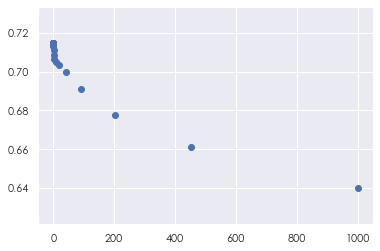

In [224]:
plt.scatter(np.logspace(-7,3,30),np.mean(test_scores,axis = 1))

In [226]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

np.random.seed(0)
X,y = iris.data,iris.target

indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices],y[indices]

size  = [30,50,70,90,110,120]

train_sizes,train_scores,test_scores = learning_curve(SVC(kernel="linear"),X,y,train_sizes = size,cv = 5)

In [227]:
train_scores

array([[0.93333333, 0.96666667, 0.96666667, 0.96666667, 0.96666667],
       [0.98      , 0.98      , 0.98      , 0.98      , 0.98      ],
       [0.98571429, 1.        , 0.98571429, 0.98571429, 0.98571429],
       [0.98888889, 1.        , 0.98888889, 0.98888889, 0.98888889],
       [0.98181818, 1.        , 0.98181818, 0.98181818, 0.99090909],
       [0.98333333, 0.99166667, 0.98333333, 0.99166667, 0.99166667]])

In [228]:
test_scores

array([[1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 1.        ],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.93333333, 1.        , 1.        , 0.96666667]])

In [229]:
np.mean(train_scores,axis = 1)

array([0.96      , 0.98      , 0.98857143, 0.99111111, 0.98727273,
       0.98833333])

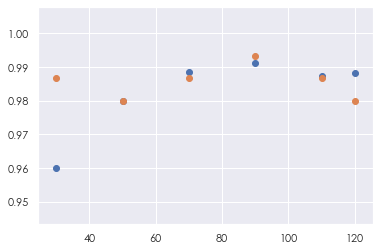

In [230]:
plt.scatter(y = np.mean(train_scores,axis = 1),x = size)
plt.scatter(y = np.mean(test_scores,axis = 1),x = size)

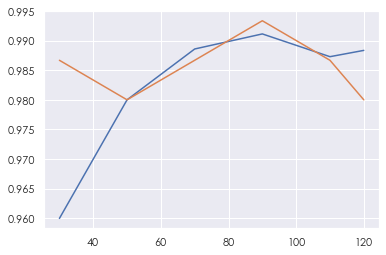

In [232]:
sns.lineplot(y = np.mean(train_scores,axis = 1),x = size)
sns.lineplot(y = np.mean(test_scores,axis = 1),x = size)

In [233]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(random_state = 1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators = [("lr",clf1),("rf",clf2),("gnb",clf3)],voting = "hard").fit(iris.data,iris.target)


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [234]:
eclf1.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=1, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
                        warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

In [236]:
eclf1.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [237]:
eclf2 = VotingClassifier(estimators = [("lr",clf1),("rf",clf2),("gnb",clf3)],voting = "soft").fit(iris.data,iris.target)
eclf2.predict_proba(iris.data[:10])

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[9.59343435e-01, 4.06529667e-02, 3.59830832e-06],
       [9.32352764e-01, 6.76371377e-02, 1.00983081e-05],
       [9.50665888e-01, 4.93254932e-02, 8.61836192e-06],
       [9.41135340e-01, 5.88453864e-02, 1.92739235e-05],
       [9.65344991e-01, 3.46512788e-02, 3.73024462e-06],
       [9.75411418e-01, 2.45842615e-02, 4.32041980e-06],
       [9.64698949e-01, 3.52879784e-02, 1.30722065e-05],
       [9.53344803e-01, 4.66489049e-02, 6.29170414e-06],
       [9.33676214e-01, 6.62955849e-02, 2.82008532e-05],
       [9.30887464e-01, 6.91040009e-02, 8.53505210e-06]])

In [240]:
# 网格搜索与投票分类器结合使用
from sklearn.model_selection import GridSearchCV

clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(random_state = 1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators= [("lr",clf1),("rf",clf2),("gnb",clf3)],voting = "soft")

params = {"lr__C":[1.0,10.0],"rf__n_estimators" : [20,200]}
grid = GridSearchCV(estimator = eclf,param_grid = params,cv = 5)
grid = grid.fit(iris.data,iris.target)

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [241]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014000,0.004895,0.000000,0.000000,1,20,"{'lr__C': 1.0, 'rf__n_estimators': 20}",0.933333,0.966667,0.933333,0.933333,1.0,0.953333,0.026667,3
1,0.102275,0.007080,0.008028,0.004014,1,200,"{'lr__C': 1.0, 'rf__n_estimators': 200}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,1
2,0.010000,0.000021,0.000000,0.000000,10,20,"{'lr__C': 10.0, 'rf__n_estimators': 20}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,1
3,0.107145,0.007270,0.006701,0.004261,10,200,"{'lr__C': 10.0, 'rf__n_estimators': 200}",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,3


In [243]:
grid.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [244]:
grid.predict_proba(iris.data[:10])

array([[9.59343435e-01, 4.06529667e-02, 3.59830832e-06],
       [9.32352764e-01, 6.76371377e-02, 1.00983081e-05],
       [9.50665888e-01, 4.93254932e-02, 8.61836192e-06],
       [9.41135340e-01, 5.88453864e-02, 1.92739235e-05],
       [9.65344991e-01, 3.46512788e-02, 3.73024462e-06],
       [9.75411418e-01, 2.45842615e-02, 4.32041980e-06],
       [9.64698949e-01, 3.52879784e-02, 1.30722065e-05],
       [9.53344803e-01, 4.66489049e-02, 6.29170414e-06],
       [9.33676214e-01, 6.62955849e-02, 2.82008532e-05],
       [9.30887464e-01, 6.91040009e-02, 8.53505210e-06]])

In [247]:
grid.predict(iris.data[:5])

array([0, 0, 0, 0, 0])

In [248]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [257]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target']

In [262]:
iris.feature_names.remove("target")

In [263]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [265]:
pd.DataFrame(iris.data,columns = iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [267]:
from sklearn import datasets
iris = datasets.load_iris()

In [268]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators = 100,max_samples = 0.5,max_features = 0.5)
bagging.fit(iris.data,iris.target)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.5, max_samples=0.5, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [269]:
bagging.estimators_samples_[0][:20]

array([ 91,  61,  86,  20,  90,  60,  71,  86,  69, 133, 149, 141,  84,
        68,  11, 123,  87,  21,  70,  60])

In [270]:
bagging.estimators_features_[:5]

[array([0, 3]), array([0, 2]), array([2, 1]), array([1, 3]), array([1, 2])]

In [271]:
bagging.estimators_[:2]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=260890991, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1948869419, splitter='best')]

In [273]:
tree1 = bagging.estimators_[0].fit(iris.data,iris.target)
tree1.predict(iris.data)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [277]:
bagging = BaggingClassifier(n_estimators = 100,max_samples = 0.5,oob_score = True)
bagging.fit(iris.data,iris.target)
bagging.oob_score_

0.96

In [ ]:
# 回归模型的bagging模型